**<h1><center>Bank Data Exploratory Data analysis</center></h1>**

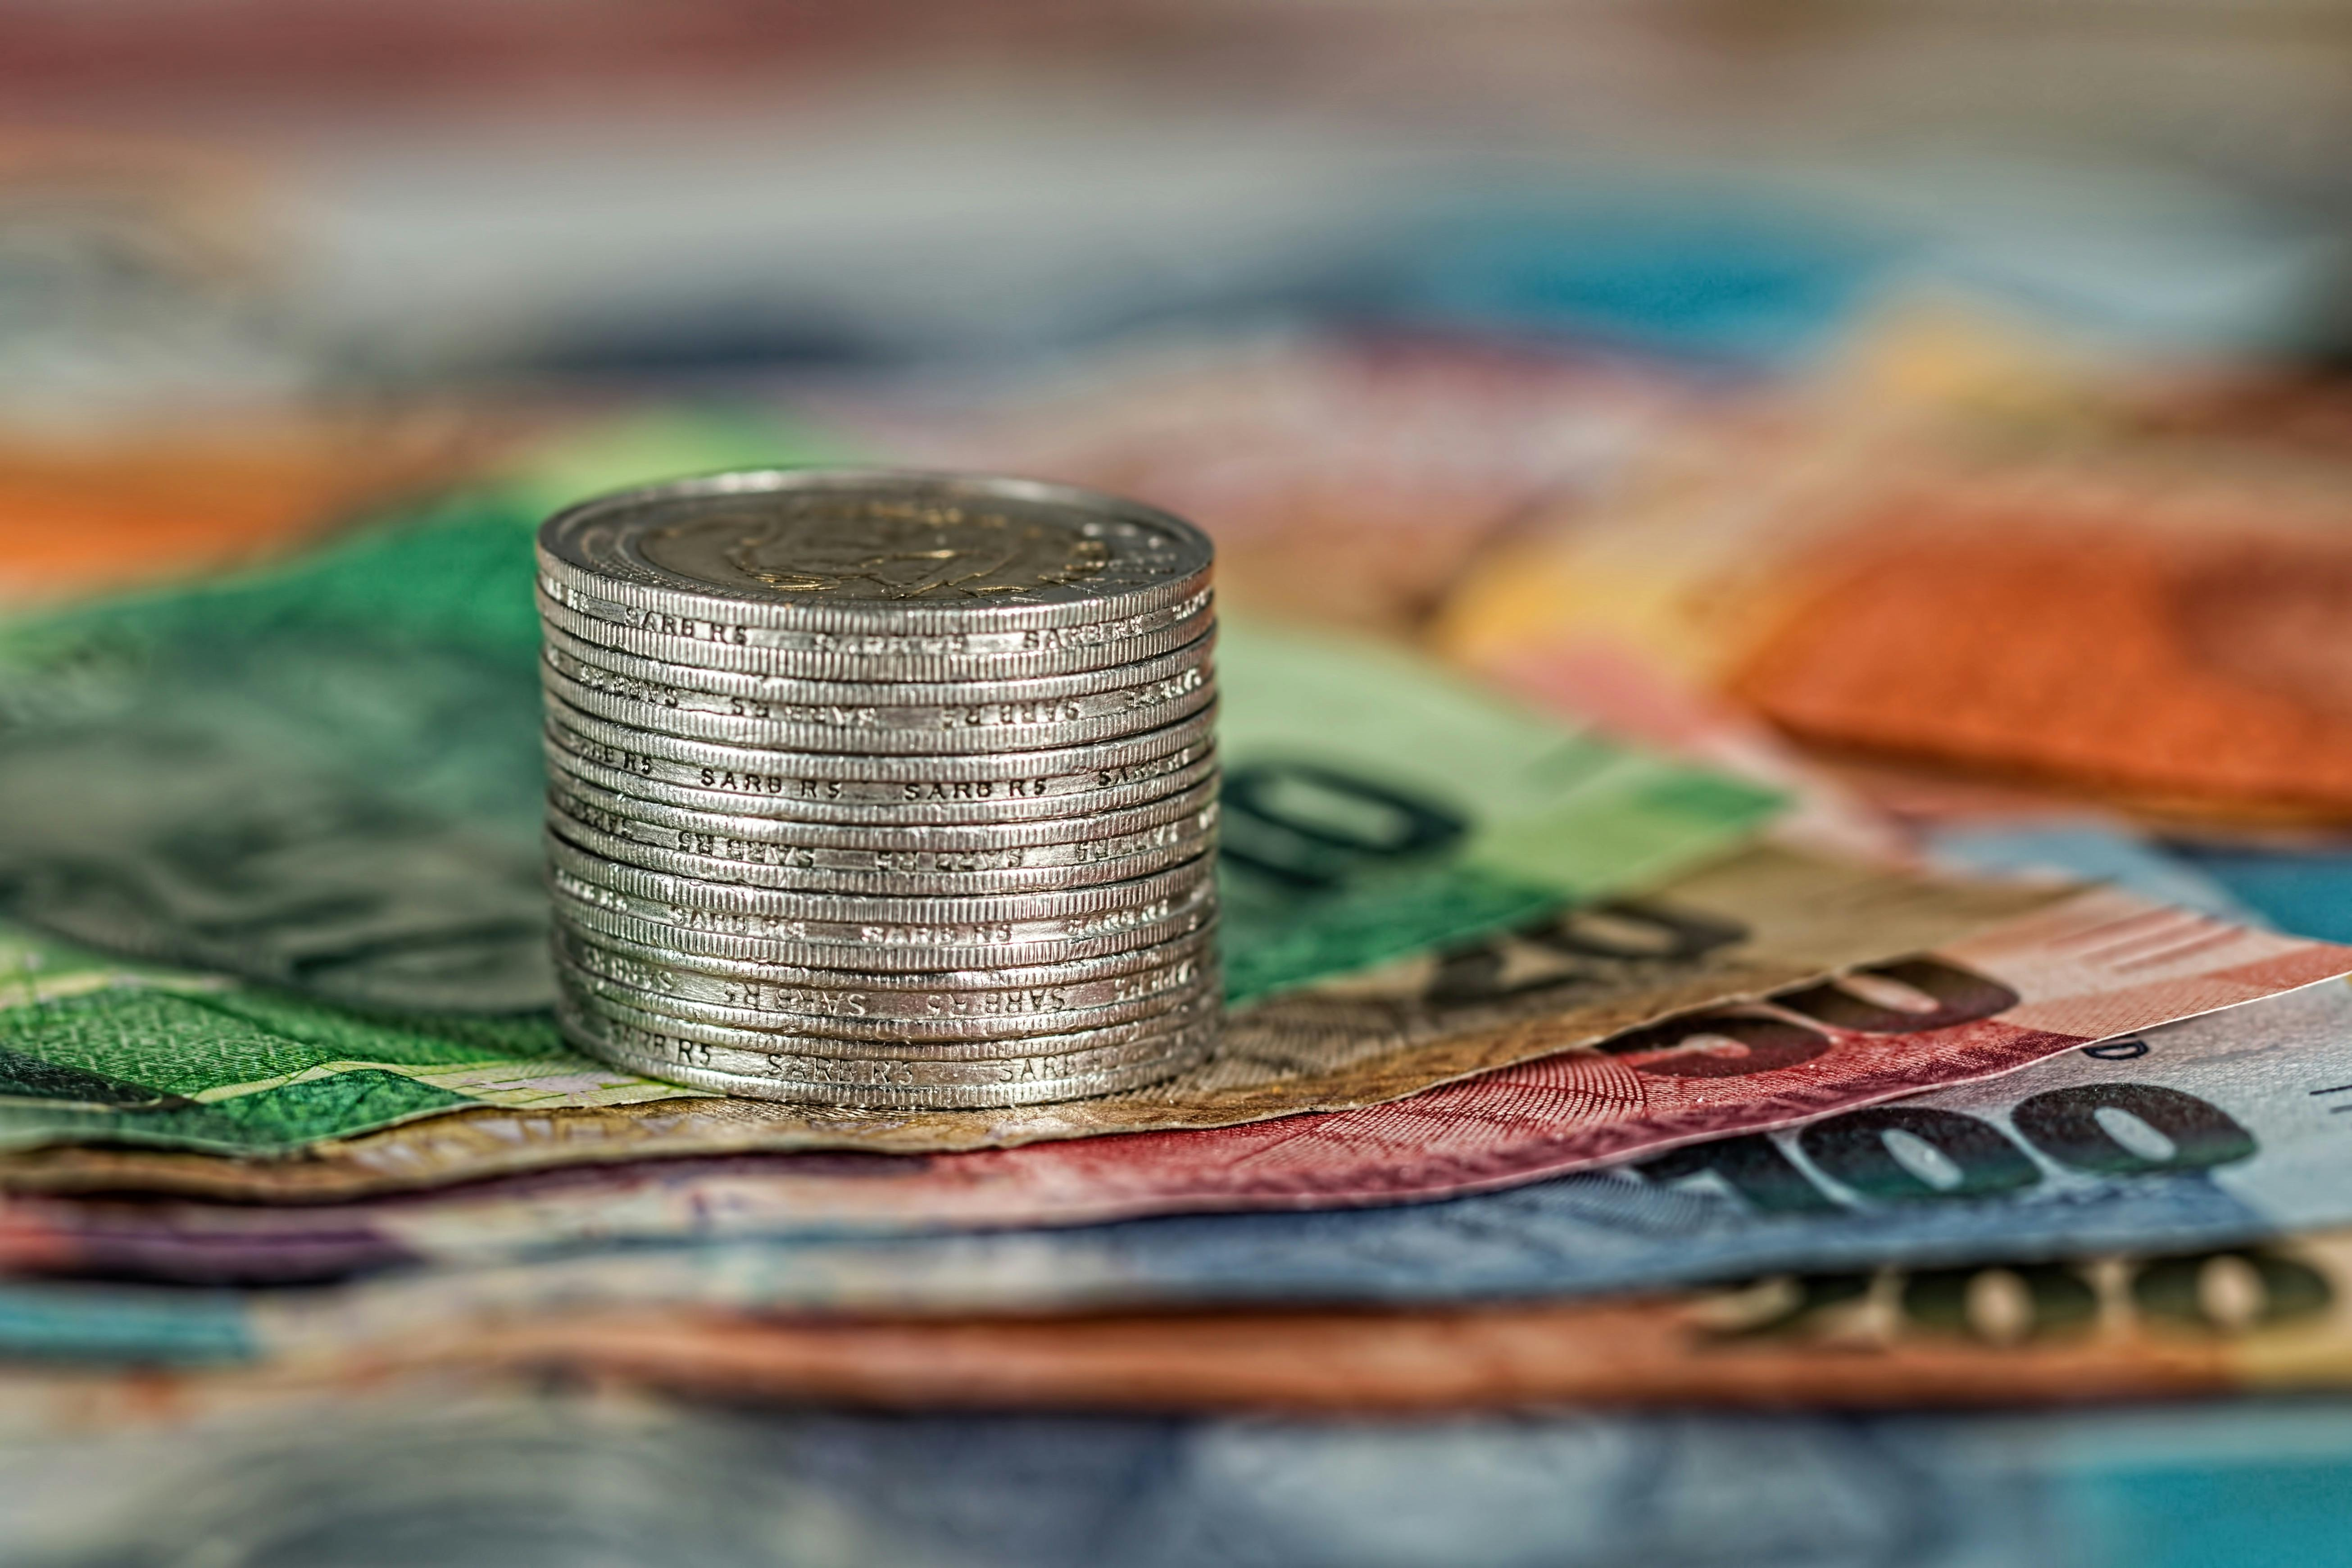

In [1]:

from IPython.display import Image
image_path = "cover.jpg"
# Display the image
Image(filename=image_path)

### Table Of Content
* 1 Introduction
* 2 Libraries & Configuration
  * 2.1 Libraries
  * 2.2 Configuration
* 3 Data wrangling
  * 3.1 Missing values
  * 3.2 Outliers
* 4 EXploratory Data Analysis
  * 4.1 Target Variable
  * 4.2 Numerical Variable
  * 4.3 Categorical Variables
* 5 Insights

  

# Introduction:
In the competitive landscape of banking, understanding customer behavior is not just advantageous—it’s essential. This dataset provides a glimpse into direct marketing campaigns conducted by a Portuguese banking institution. Through phone calls, the bank aimed to determine whether clients would subscribe to a specific product (bank term deposit).

As we delve into this data, we’ll uncover patterns, analyze customer attributes, and gain insights that can inform targeted marketing strategies. Join me on this journey as we harness the power of Pandas to unlock valuable information and enhance decision-making in the financial domain. 🏦

### Problem Statement:
In the context of a Portuguese banking institution, they face the challenge of improving the effectiveness of direct marketing campaigns. These campaigns rely on phone calls to potential clients, with the primary goal of promoting a specific product: bank term deposits.

However, they encounter several obstacles:

- Multiple Contacts: Often, multiple contacts are necessary to determine whether a client will subscribe to the term deposit product.

- Resource Allocation: Limited resources (time, manpower) require them to strategically target clients most likely to convert.

- Understanding Client Attributes: They lack a comprehensive understanding of client attributes that drive successful conversions.

### Objective:
The main goal of this project is to enhance the efficiency of the marketing efforts by analyzing customer data, identifying key attributes, and tailoring the approach, I aim to increase subscription rates for term deposits. Let’s delve into the data and uncover actionable insights to optimize  marketing strategy. 🏦📊

### Data Sources:

The data for this project will be sourced from bank database.
* <a href="https://www.kaggle.com/datasets/krantiswalke/bankfullcsv" target="_blank">
    <img src="https://img.shields.io/badge/Kaggle-035a7d?style=for-the-badge&logo=kaggle&logoColor=white" alt="Kaggle">

 </a>

This project also serves as an assessment for the Data Science Diploma at AltSchool.
* [Alt school Data science](https://altschoolafrica.com/)

### Summary :

- The subscription rate for term deposits is low, with only 24% of clients opting for them.
- Older individuals are more likely to subscribe, suggesting that age plays a role in subscription decisions.
- Clients with higher balances tend to subscribe.
- Longer conversations during calls positively influence subscription outcomes.
- Recent contact matters, and building on successful past interactions is crucial.
- Demographics (such as job type, marital status, default status, and education level) impact subscription rates.
- Cellular contacts are more effective than other methods.
- Timing, including seasonal patterns, plays a crucial role in client subscriptions.



# 2 Libraries & Configurations

### 2.1 Libraries
Loading the relevant libraries and user-defined functions

In [2]:
"""importing relevant libraries"""
import pandas as pd  # for data manipulation
import numpy as np   # for data computation
import matplotlib.pyplot as plt #for 2D data visualization
import seaborn as sns    #for 2D data visualization
from scipy import stats     # for statistics
import seaborn as sns

#function to check the percentage of missing values in each colunm
def missing_value_percentage(df):
    # Calculate the percentage of missing values for each column
    missing_percentage = round(df.isnull().mean().reset_index(),2)
    missing_percentage.columns = ['Column', 'Missing Percentage']
    print(missing_percentage)

%matplotlib inline

### 2.2 Configurations
Setting the configurations to be used for our analysis.

In [3]:
# padding value
left_padding = 21

#set seaborn theme
sns.set_theme(style="darkgrid")

# 3. Data Wrangling
This data set has 45,211 rows and 17 columns with no missing values.


In [4]:
#loading the dataframe
df= pd.read_csv('bank-full.csv',sep=';')
#viewing the dataframe
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [5]:
#checking the number of rows and columns
df.shape

(45211, 17)

In [6]:
#cheking information on the all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
#checking statistical information about the numeric colunms
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [8]:
#checking the summary of the categorical columns
df.describe(include=['object']).T

count unique          top   freq
job        45211     12  blue-collar   9732
marital    45211      3      married  27214
education  45211      4    secondary  23202
default    45211      2           no  44396
housing    45211      2          yes  25130
loan       45211      2           no  37967
contact    45211      3     cellular  29285
month      45211     12          may  13766
poutcome   45211      4      unknown  36959
y          45211      2           no  39922

In [9]:
#renaming the 'y' column for better visualization
df.rename(columns={'y':'subscribed'},inplace=True)

### 3.1 Missing Values
In the dataset, some missing values were originally labeled as ‘unknown.’ To ensure more accurate insights, these missing values have been removed. As a result, the updated dataframe now contains 7,377 rows and 18 columns.

In [10]:
#checking for missing data
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [11]:
#mapping unkwon to nan
df.replace('unknown', np.nan, inplace=True)


In [12]:
#rechecking for missing data
df.isnull().sum()

age               0
job             288
marital           0
education      1857
default           0
balance           0
housing           0
loan              0
contact       13020
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome      36959
subscribed        0
dtype: int64

In [13]:
#checking percentage of missing values
missing_value_percentage(df)

        Column  Missing Percentage
0          age                0.00
1          job                0.01
2      marital                0.00
3    education                0.04
4      default                0.00
5      balance                0.00
6      housing                0.00
7         loan                0.00
8      contact                0.29
9          day                0.00
10       month                0.00
11    duration                0.00
12    campaign                0.00
13       pdays                0.00
14    previous                0.00
15    poutcome                0.82
16  subscribed                0.00


In [14]:
#droping missing values
df.dropna(axis=0,inplace=True)

In [15]:
#checking the number of rows and columns after the cleaning
df.shape

(7842, 17)

### 3.2 Outliers
The box plot revealed the following insights on outliers in our dataset.
- Age:  
The distribution of ages in the dataset shows a fairly symmetrical shape with a median around 40 years old. There are some outliers on both ends, indicating individuals with significantly higher or lower ages.

- Balance:  
The ‘balance’ variable has a median close to zero, but there are many high-value outliers. This suggests that while most individuals have relatively low account balances, some have significantly higher balances.
- Duration:  
The ‘duration’ boxplot indicates the duration of some event (possibly calls or interactions). Most calls appear to be relatively short, but there are several high-value outliers, suggesting some exceptionally long interactions.

- Campaign:  
The ‘campaign’ variable represents information related to marketing campaigns. Most people were contacted only a few times, but there are outliers who were contacted more frequently.

- Previous:  
Similar to ‘campaign’, the ‘previous’ plot suggests that most individuals have not been previously contacted or have been contacted very few times.


To enhance the quality of insights derived from our dataset, we removed outliers. Specifically, we set cutoff points of 35,000 for the ‘balance’ column, 50 for the ‘previous’ column, and 2,000 for the ‘duration’ column. After addressing the outliers, the updated dataframe now consists of 7,364 rows and 18 columns.

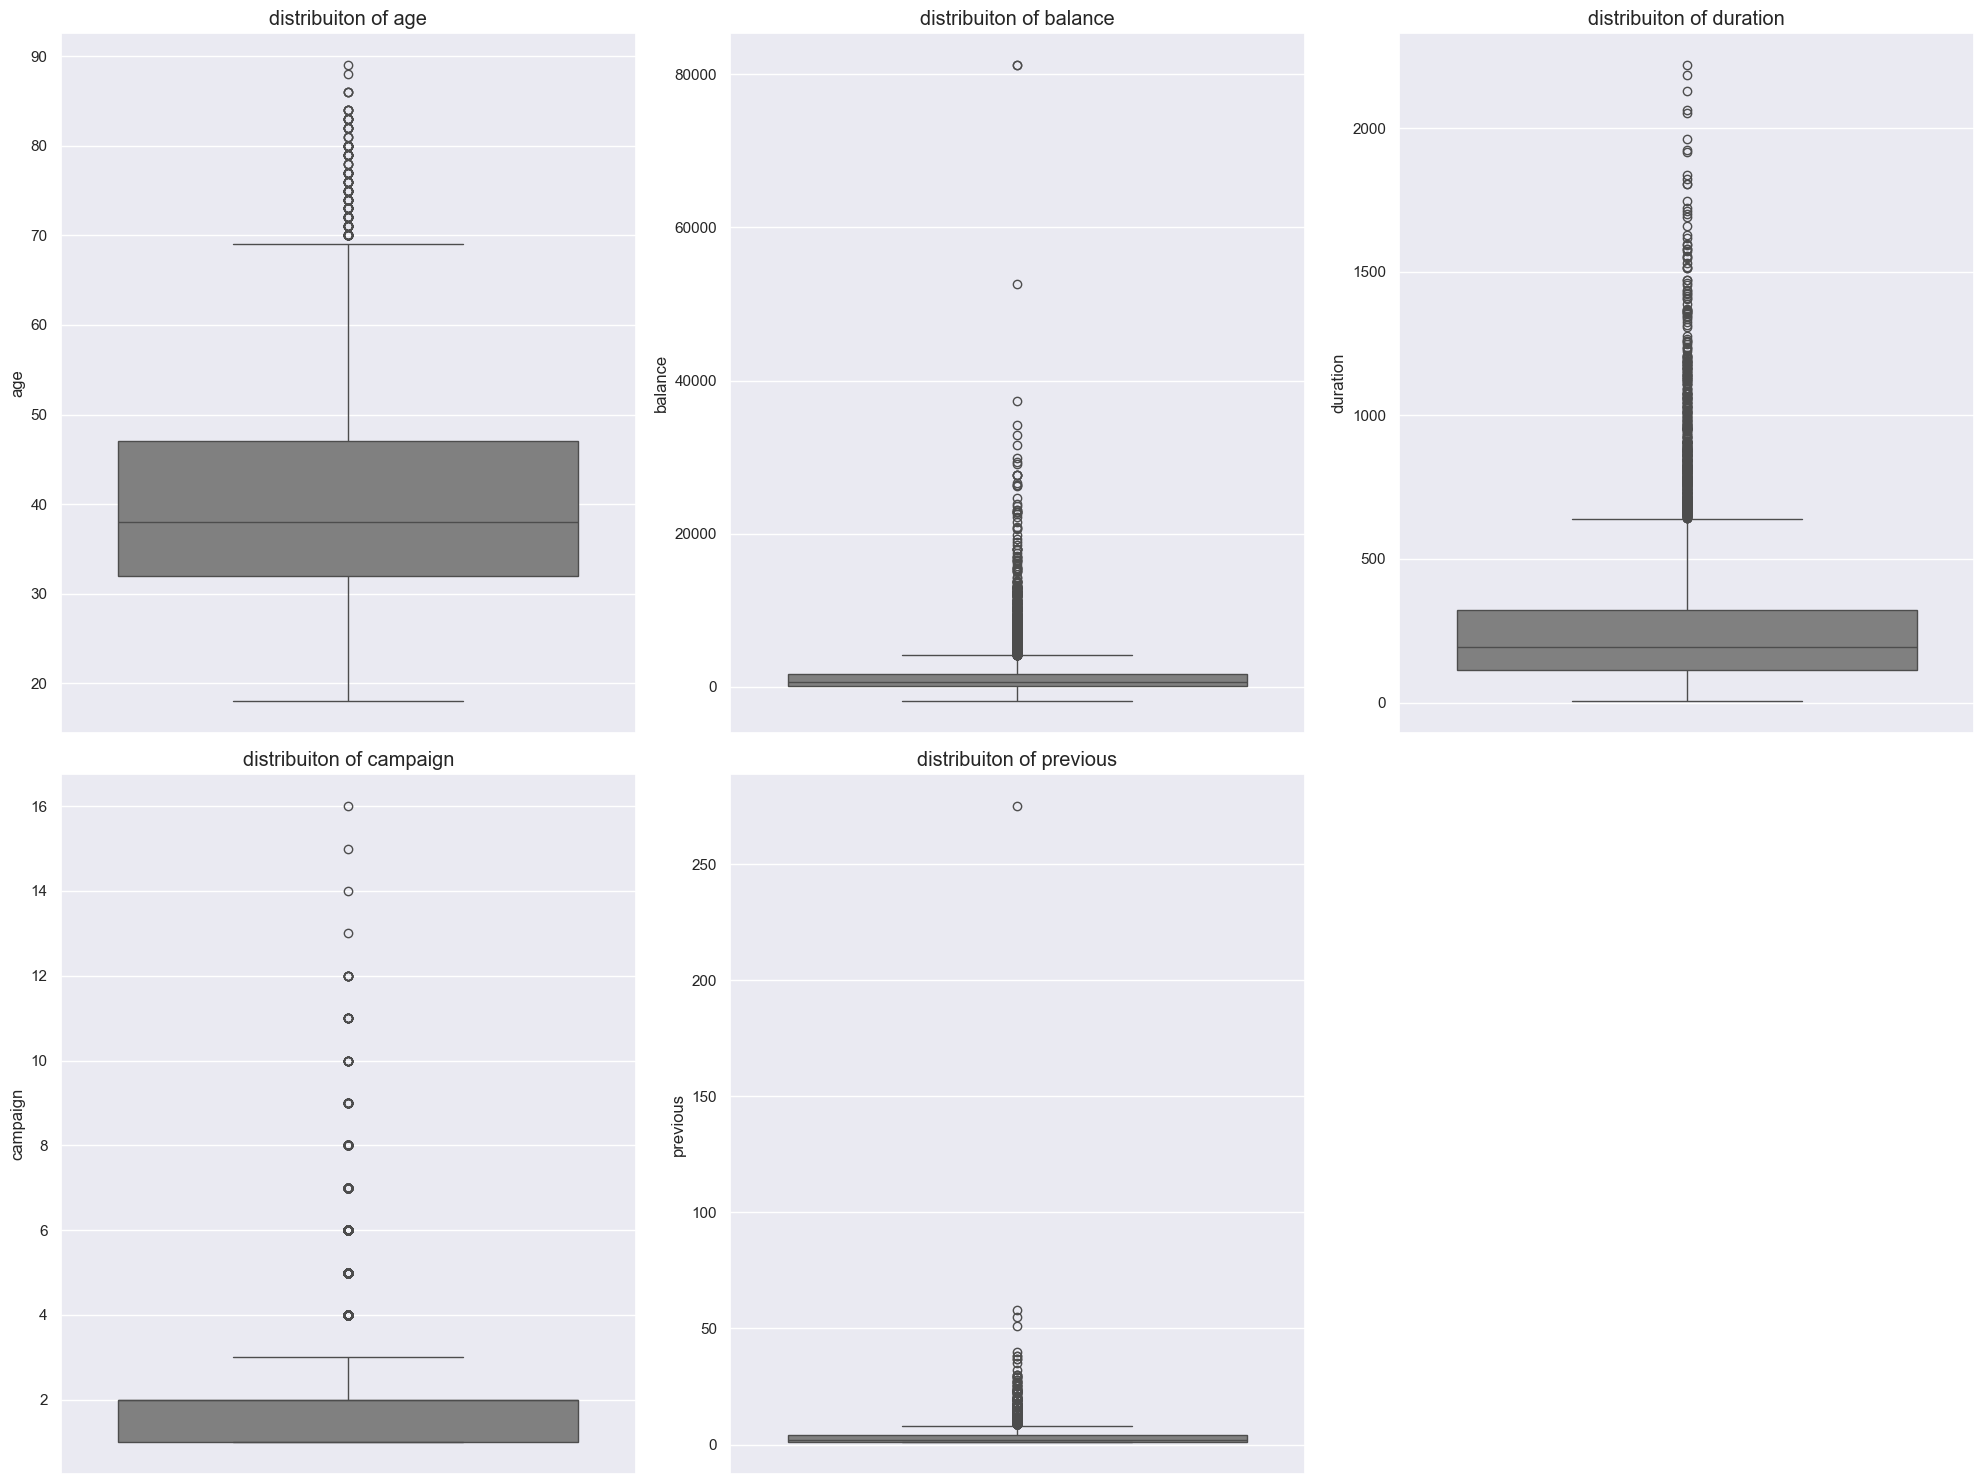

In [16]:
# creating the box plots
numeric_columns = ['age', 'balance','duration', 'campaign', 'previous']
titles = [f'distribuiton of {col}' for col in numeric_columns]

# Create the subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Creating the box plots
for i, (col, title) in enumerate(zip(numeric_columns, titles)):
    sns.boxplot(data=df, y=col, color='gray', ax=axes_flat[i])
    axes_flat[i].set_title(title, fontsize='large')
    axes_flat[i].tick_params(axis='x', rotation=45)

# Remove any empty subplot
for i in range(len(numeric_columns), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()

In [17]:
#setting cut off points for colunms with extreme values of outliers
balance = 35000
previous = 50
duration = 2000
df = df[(df['balance'] <= balance) & (df['previous'] <= previous) & (df['duration'] <= duration)]

In [18]:
df.shape

(7829, 17)

# 4.0 Exploratory Data Analysis



### 4.1 Target Variable- subscribed

In our exploratory data analysis, we’ve designated the variable ‘subscribed’ as our target variable. This choice is pivotal for evaluating the effectiveness of our marketing campaigns, as it directly correlates with campaign outcomes—whether a client subscribed to the term deposits advertised by the marketing team. Interestingly, the data reveals that only 24% of our clients opted for these term deposits.

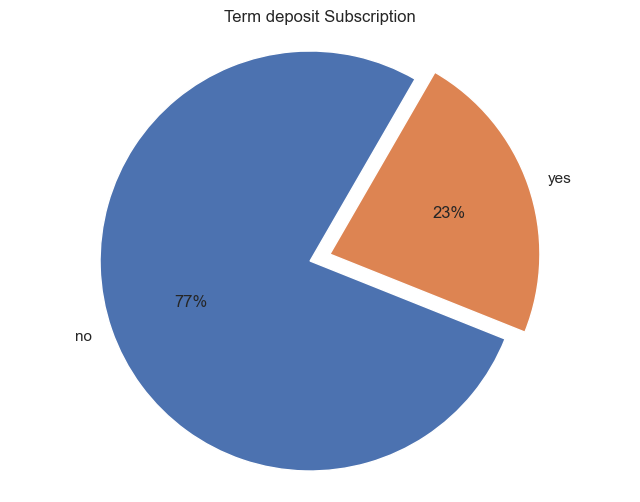

In [19]:
#checking the distribution subscribed clients with a bar chart
# Count the occurrences of each category
category_counts = df['subscribed'].value_counts()
explode = (0, 0.1)  # Separate the second slice (Category B)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index,explode=explode, autopct='%.0f%%', startangle=60)
plt.title('Term deposit Subscription')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

### 4.2 Numeric Variables -
### age, balance,duration,campaign,pdays,previous  

The heatmap visually represents the correlation coefficients between numeric variables in our dataset. Each cell in the matrix corresponds to the correlation between two variables color coded with Dark purple indicating strong negative correlations (values close to -1), Dark red indicating strong positive correlations (values close to 1) and White represents no or very little correlation (values close to 0).

Correlation Heatmap Summary:

- Age vs. Balance: There’s a weak positive correlation (0.098) between age and balance.

- Duration vs. Campaign: The correlation between call duration and campaign (number of contacts) is also weak (0.055).

- Pdays vs. Previous: Interestingly, there’s a stronger negative correlation (-0.1) between pdays (days since last contact) and previous (number of contacts from the previous campaign).

- Balance vs. Previous: The correlation between balance and previous is minimal (0.0093).

General there is a weak corrolation between the features.

This heatmap visually represents how these numeric variables relate to each other. Remember, correlation doesn’t imply causation, but it’s essential for understanding feature relationships in data analysis and machine learning. 


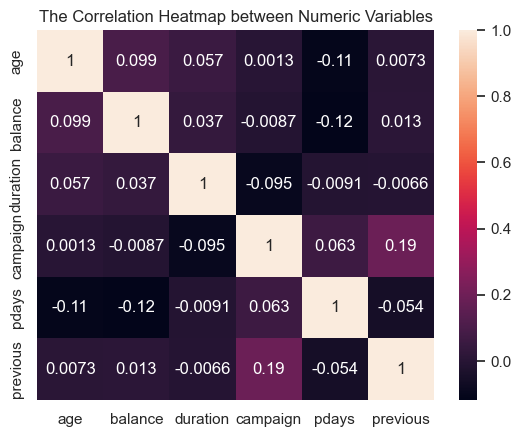

In [20]:
numeric = df[['age', 'balance','duration','campaign','pdays','previous']]
sns.heatmap(numeric.corr(),annot=True).set(title='The Correlation Heatmap between Numeric Variables')
plt.show()

#### 4.2.1 Relationship Between pdays and previous  

The plot shows the relationship between two variables: pdays (days since last contact) and previous (number of contacts before this campaign).

Most data points cluster near the origin (bottom left), indicating that as pdays increases, there isn’t a strong corresponding increase in previous.
Only a few points are spread toward the top right, suggesting cases where higher pdays correspond to higher previous values.
The scatter plot indicates that there’s no clear positive linear correlation between these variables.

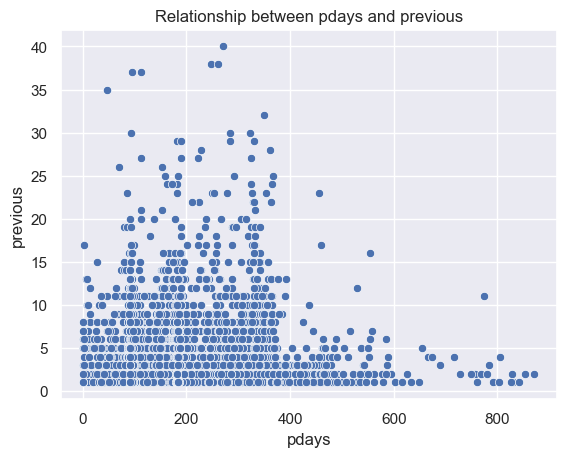

In [21]:
sns.scatterplot(x='pdays',y='previous',data=df).set(title='Relationship between pdays and previous')
plt.show()

#### 4.2.2 Distribution of Numeric variables
Here are the key takeaways from each plot distribution:

- Age Distribution:
The majority of individuals fall within the 30-40 age range.
The distribution is right-skewed, indicating fewer older individuals.

- Balance Distribution:
Most account balances are clustered near zero.
A few outliers have higher balances.

- Duration:
Call durations are primarily short.
Longer durations are less common.

- Campaign Distribution:
Most campaigns involve a low number of contacts.
Fewer instances of high-contact campaigns.

- Pdays Distribution:
A spike at -1 suggests many cases with no previous contact.
Otherwise, it’s right-skewed.

- Previous Distribution:
Most individuals had zero or very few prior contacts.

These distributions provide insights into customer behavior, marketing campaigns, and financial trends

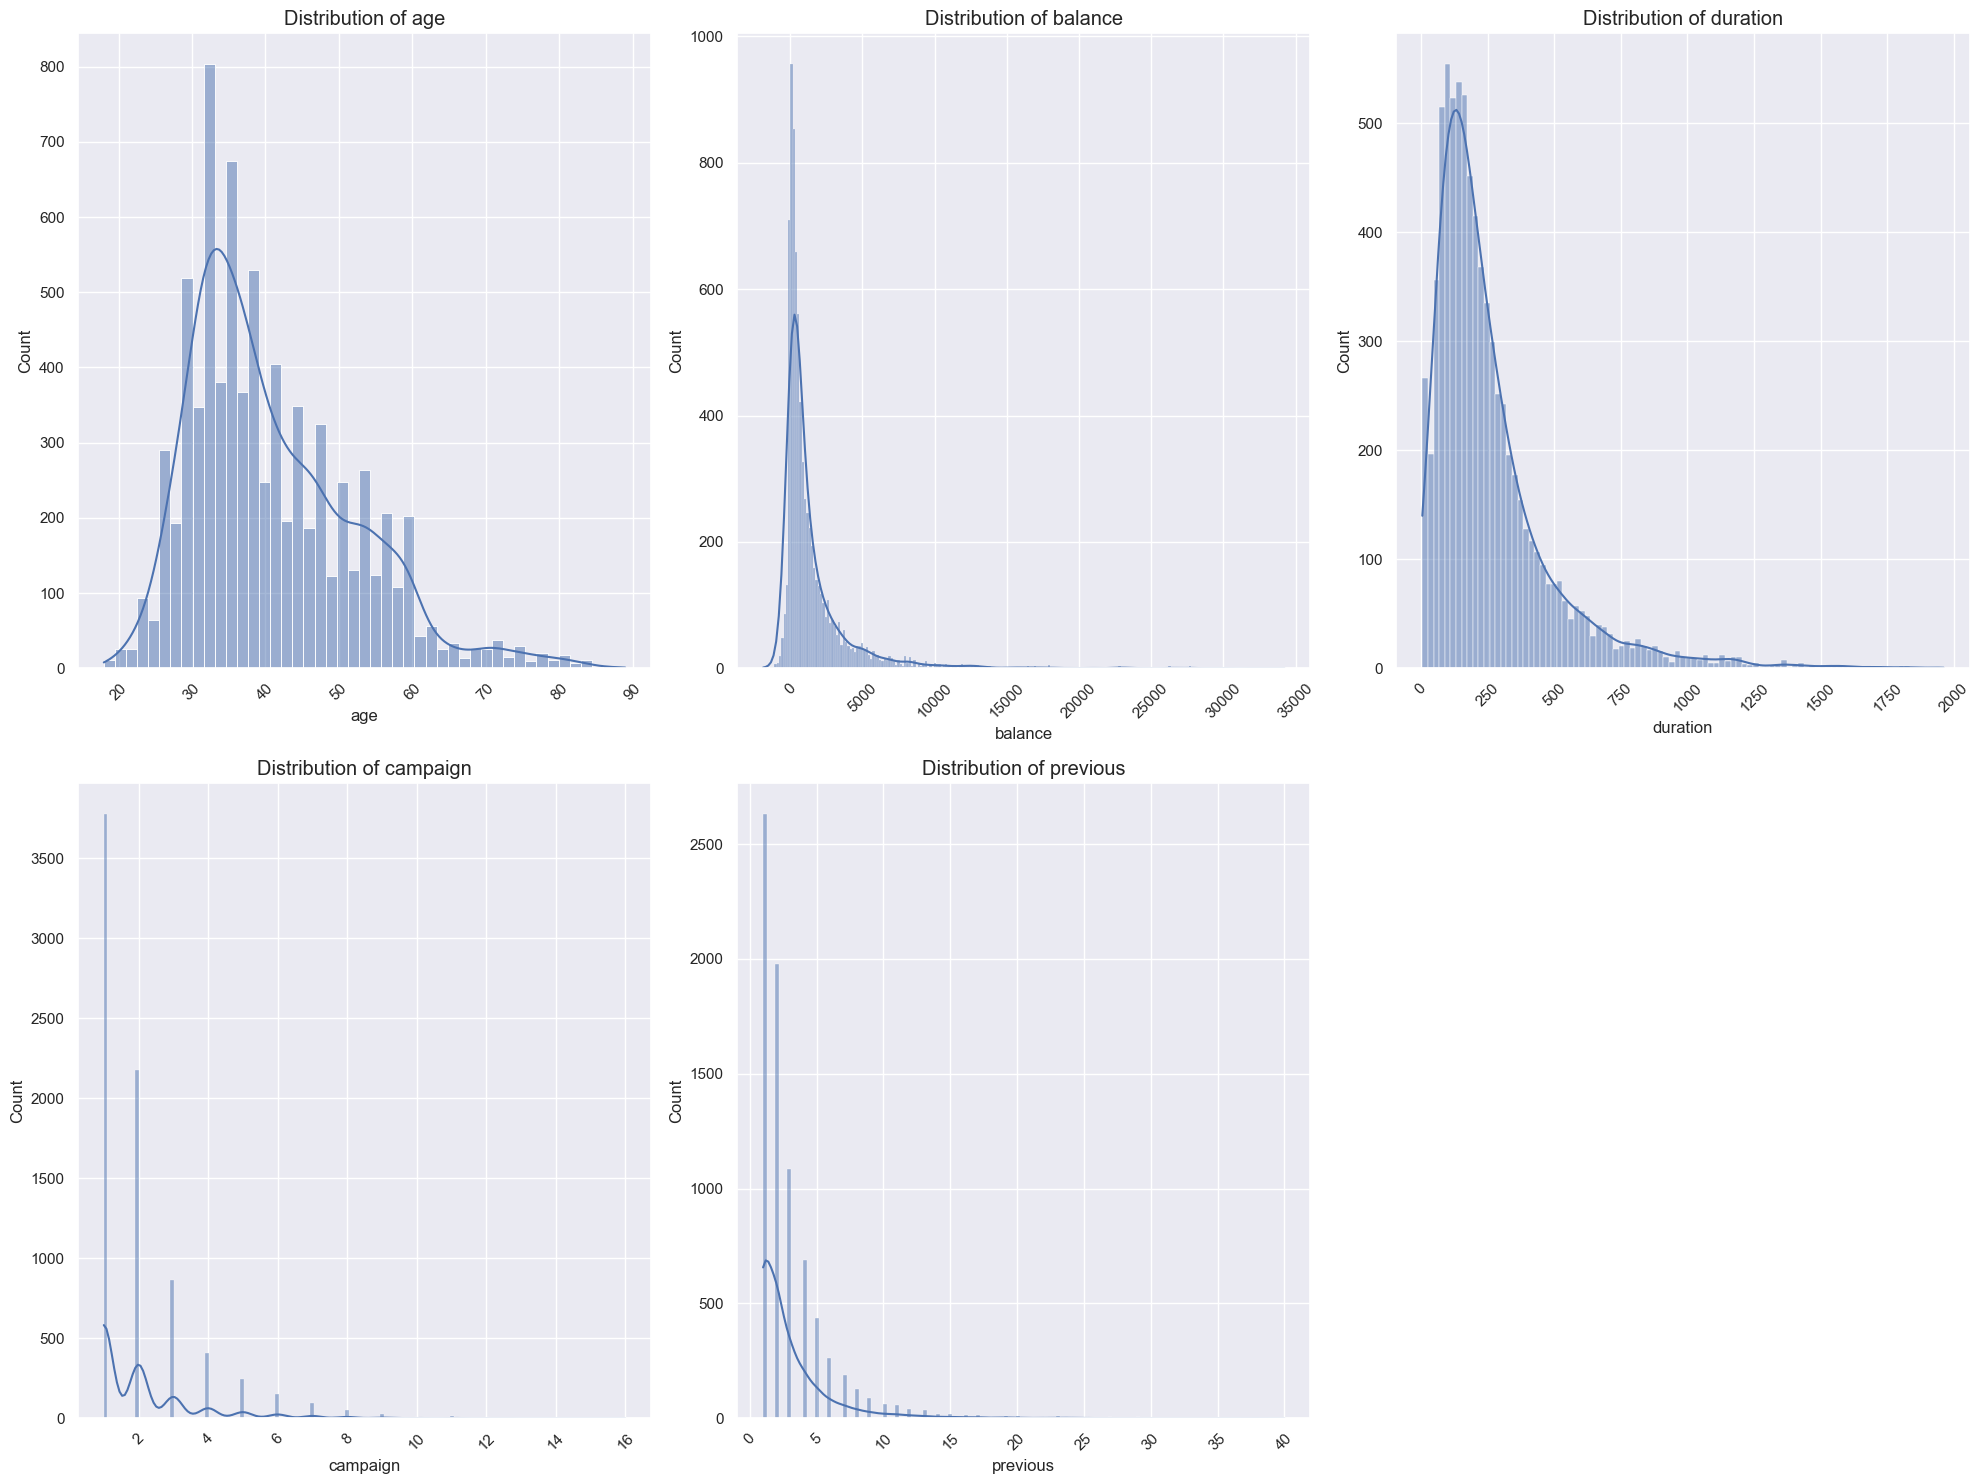

In [22]:
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'previous']
titles = [f'Distribution of {col}' for col in numeric_columns]

# Create the subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Creating the distribution plots (histograms)
for i, (col, title) in enumerate(zip(numeric_columns, titles)):
    sns.histplot(data=df, x=col, ax=axes_flat[i], kde=True)
    axes_flat[i].set_title(title, fontsize='large')
    axes_flat[i].tick_params(axis='x', rotation=45)

# Remove any empty subplot
for i in range(len(numeric_columns), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()

#### 4.2.2 Distribution of Numeric variables by the Target Variable ( Subscribed)
Let’s dive into the insights we can glean from the comparison plots that contrast the “yes” (subscribed) and “no” (not subscribed) groups. 

- Age:
Subscribed (Yes): The median age of subscribers tends to be slightly older.
Not Subscribed (No): The median age is slightly lower for non-subscribers.
Insight: Age may play a role in subscription decisions, with older individuals showing a higher likelihood of subscribing.

- Balance:
Subscribed (Yes): Subscribers exhibit a wider range of account balances, including some with significantly higher balances.
Not Subscribed (No): Non-subscribers have a narrower balance range, with fewer outliers.
Insight: Higher balances may correlate with subscription behavior.

- Duration:
Subscribed (Yes): Subscribers have a much higher median call duration, indicating more extended conversations.
Not Subscribed (No): Non-subscribers’ median duration is lower.
Insight: Longer conversations during calls may positively influence subscription outcomes.

- Campaign:
Subscribed (Yes): Both groups have similar median campaign contacts.
Not Subscribed (No): Non-subscribers show more outliers (higher contact counts).
Insight: While median contacts are similar, outliers suggest non-subscribers receive more campaign contacts.

- Pdays:
Subscribed (Yes): Fewer days have passed since last contact for subscribers.
Not Subscribed (No): Non-subscribers have a broader range of days since last contact.
Insight: Recent contact may positively impact subscription likelihood.

- Previous:
Subscribed (Yes): Subscribers had more prior contacts before this campaign.
Not Subscribed (No): Non-subscribers generally had fewer previous contacts.
Insight: Previous interactions matter; more prior contacts correlate with subscriptions.

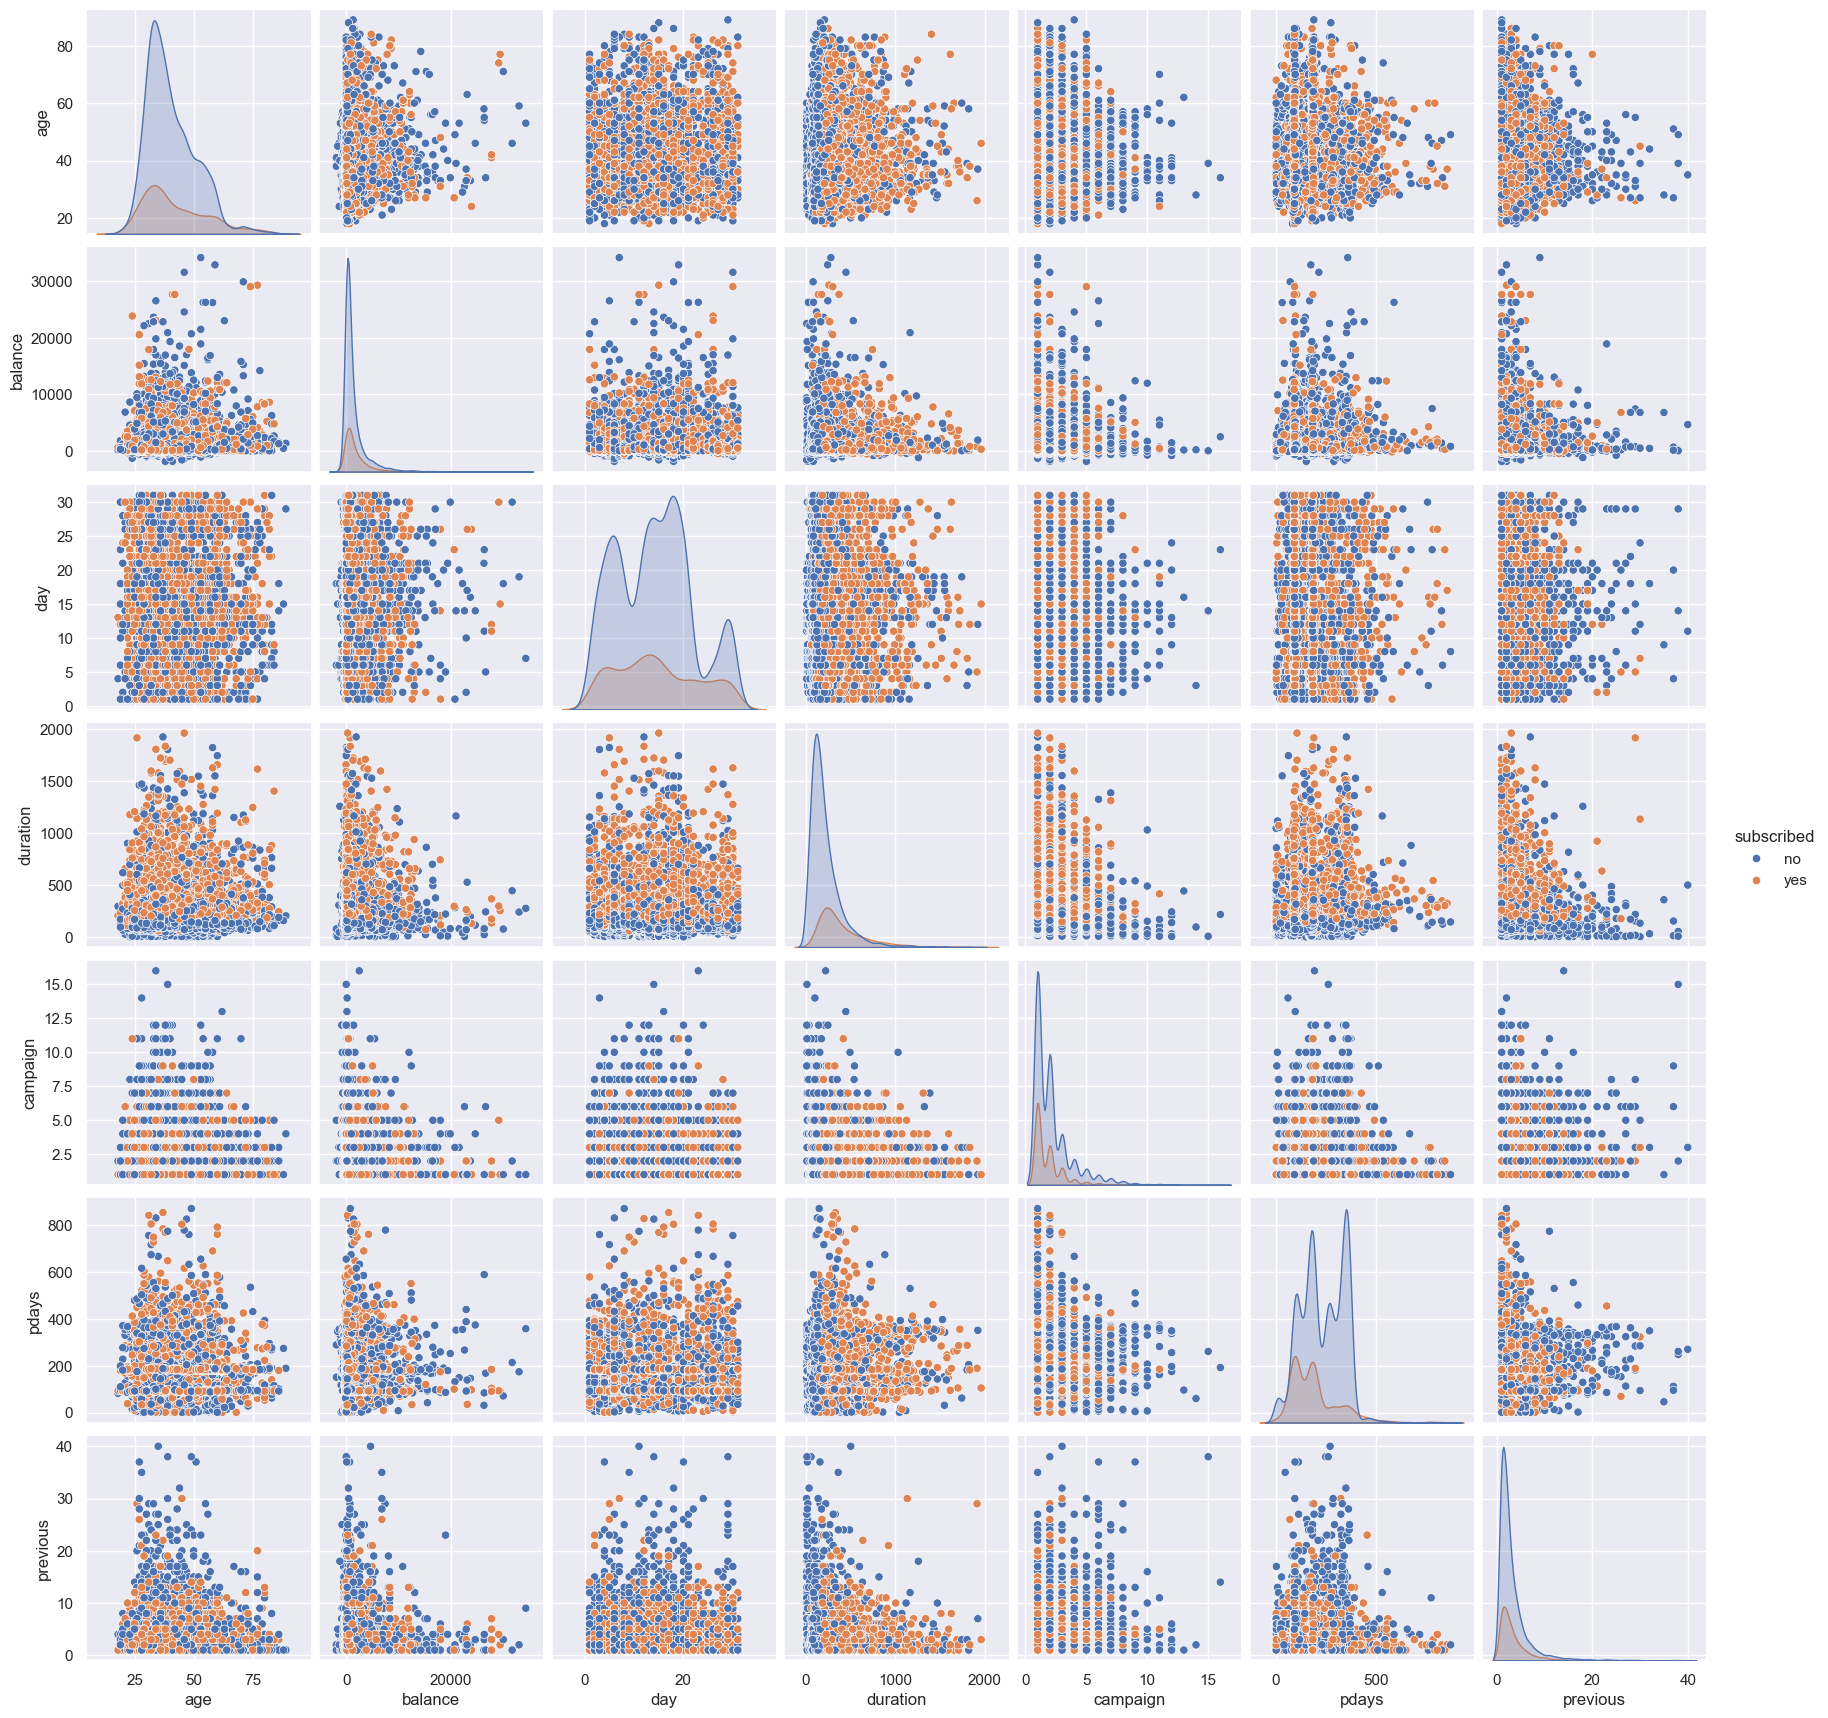

In [23]:
#creating a pairplot to visualize the relationships
sns.pairplot(df, hue='subscribed')
plt.show()

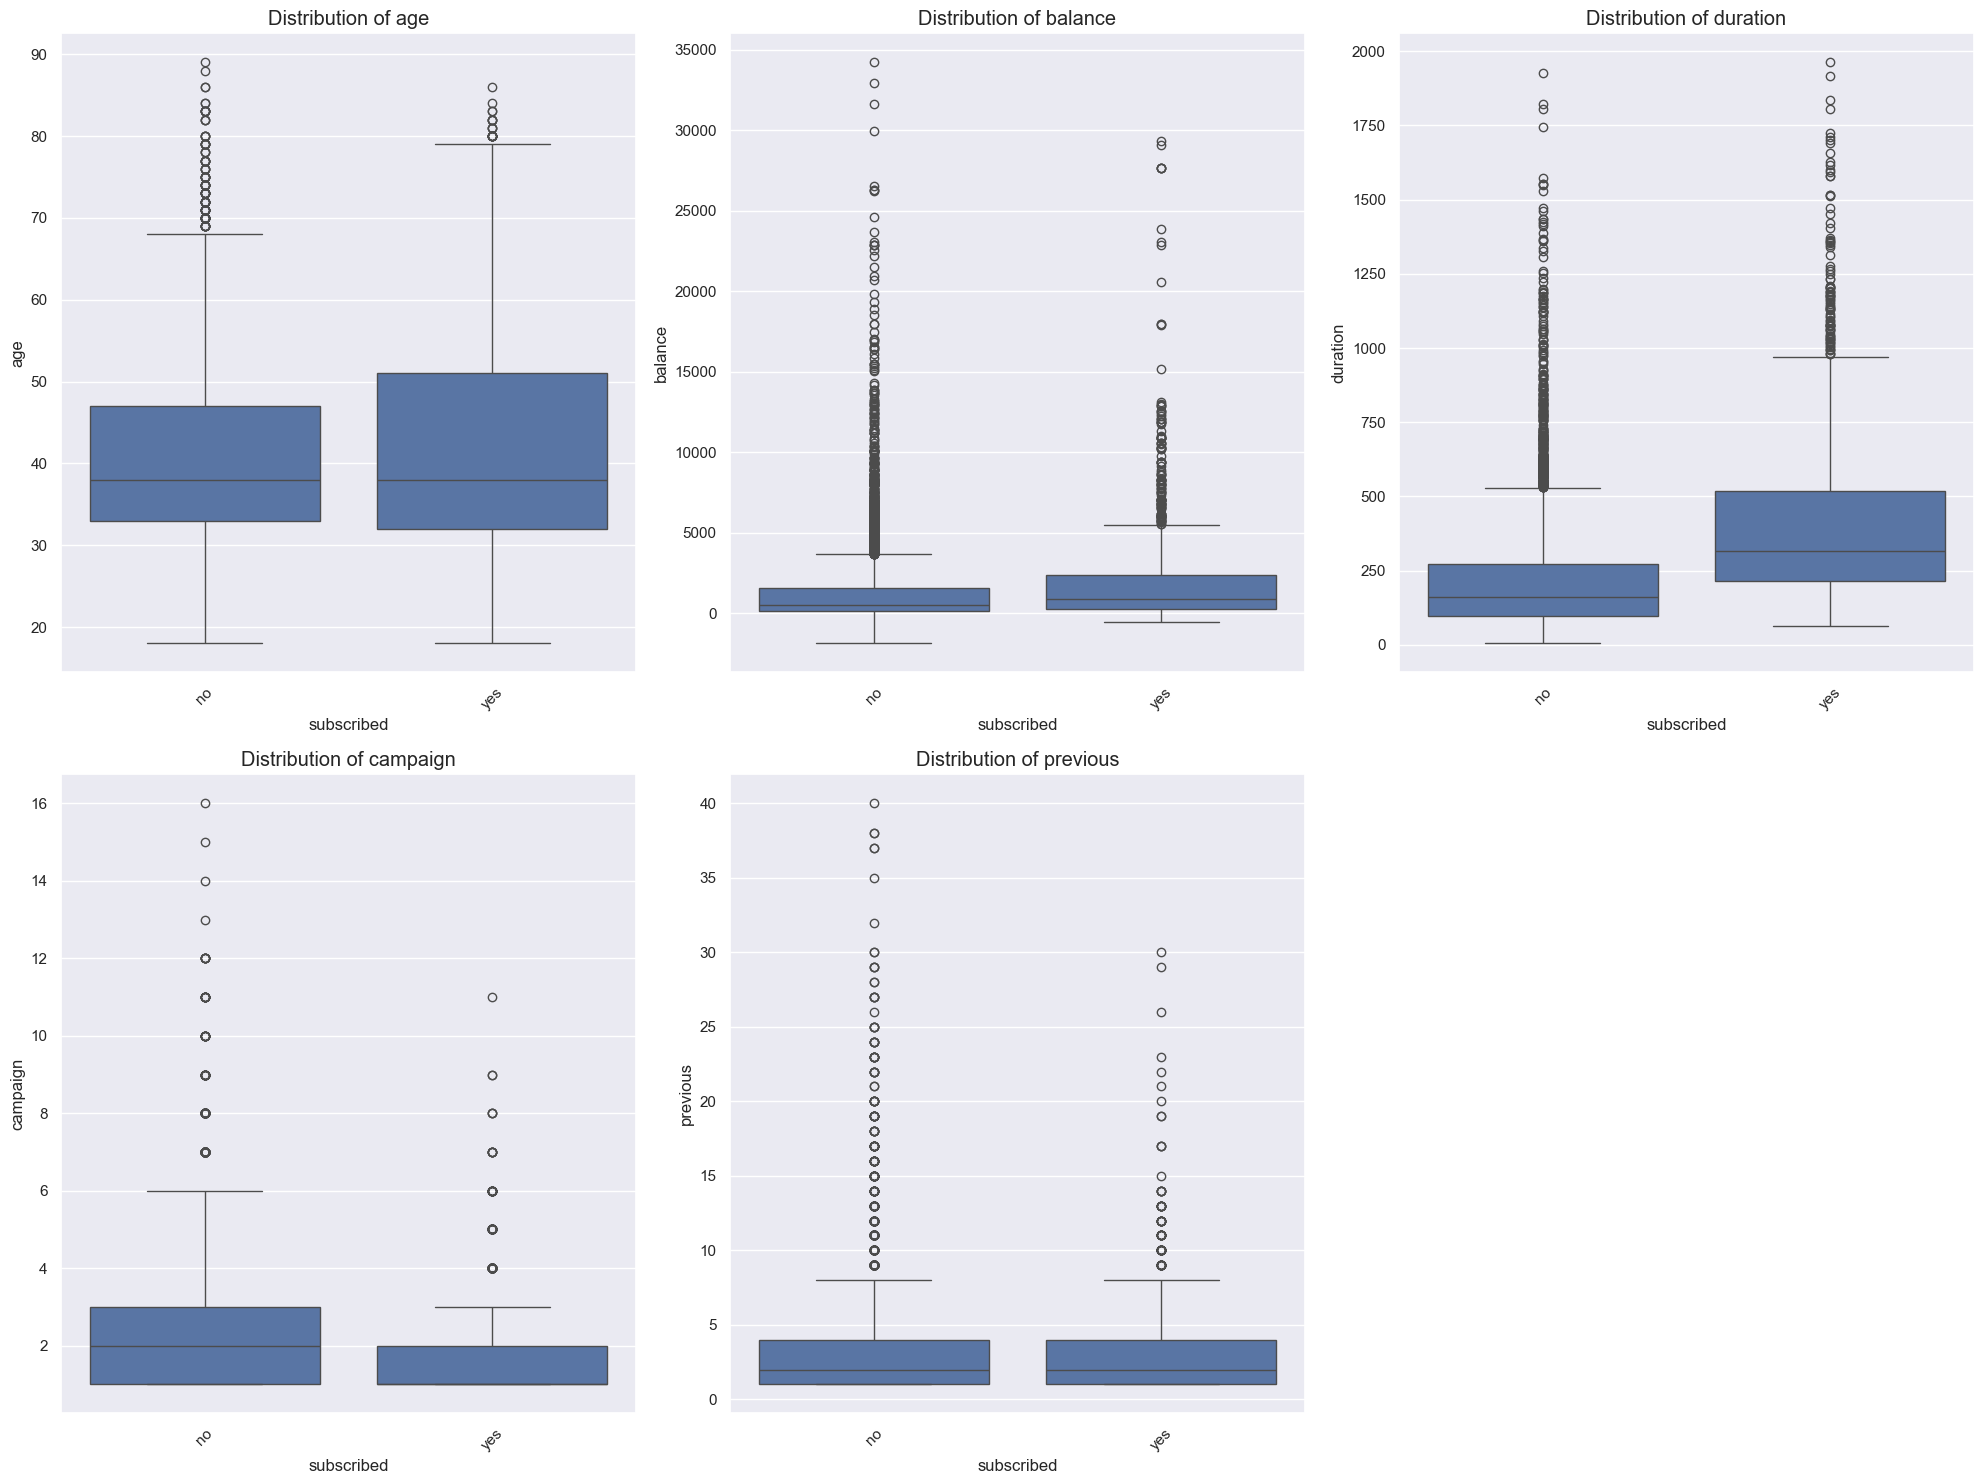

In [24]:

# Creating the boxplots

numeric_columns = ['age', 'balance', 'duration', 'campaign', 'previous']
titles = [f'Distribution of {col}' for col in numeric_columns]

# Create the subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 15))

# Flatten the axes array for easy iteration
axes_flat = axes.flatten()

# Creating the distribution plots (histograms)
for i, (col, title) in enumerate(zip(numeric_columns, titles)):
    sns.boxplot(data=df, y=col,x='subscribed', ax=axes_flat[i])
    axes_flat[i].set_title(title, fontsize='large')
    axes_flat[i].tick_params(axis='x', rotation=45)

# Remove any empty subplot
for i in range(len(numeric_columns), len(axes_flat)):
    fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()


### 4.3 Categorical Variables - category

- Job Distribution:
The most common job categories among the dataset are “blue-collar,” “management,” and “technician.”
Subscribers tend to have a higher proportion of management and technician jobs compared to non-subscribers.
Insights: Job type may influence subscription rates.

- Marital Status:
Most individuals in the dataset are either “married” or “single.”
Subscribers have a higher proportion of married individuals.
Insights: Marital status could play a role in subscription behavior.

- Education Level:
The majority of individuals have a “secondary” education.
Subscribers have a higher proportion of “tertiary” education (e.g., university degree).
Insights: Higher education levels may correlate with subscriptions.

- Default Status:
Most individuals do not have credit in default.
Subscribers have a significantly lower proportion of defaults.
Insights: Default status could impact subscription decisions.

- Housing and Loan:

Most individuals have housing loans and no personal loans.
Subscribers have a lower proportion of housing loans and personal loans.
Insights: Loan status may influence subscription rates.

- Contact Type:
The majority of contacts were made via cellular phones.
Subscribers have a higher proportion of cellular phone contacts.
Insights: Contact method matters; cellular contacts are more effective.

- Month of Contact:
Most contacts occurred in May.
Subscribers show a higher proportion of contacts in March, December, and September.
Insights: Seasonal patterns may impact subscription outcomes.

- Previous Campaign Outcome:
A large number of individuals had no previous campaign outcome data.
Subscribers have a higher proportion of successful previous outcomes.
Insights: Previous campaign success matters for future subscriptions.


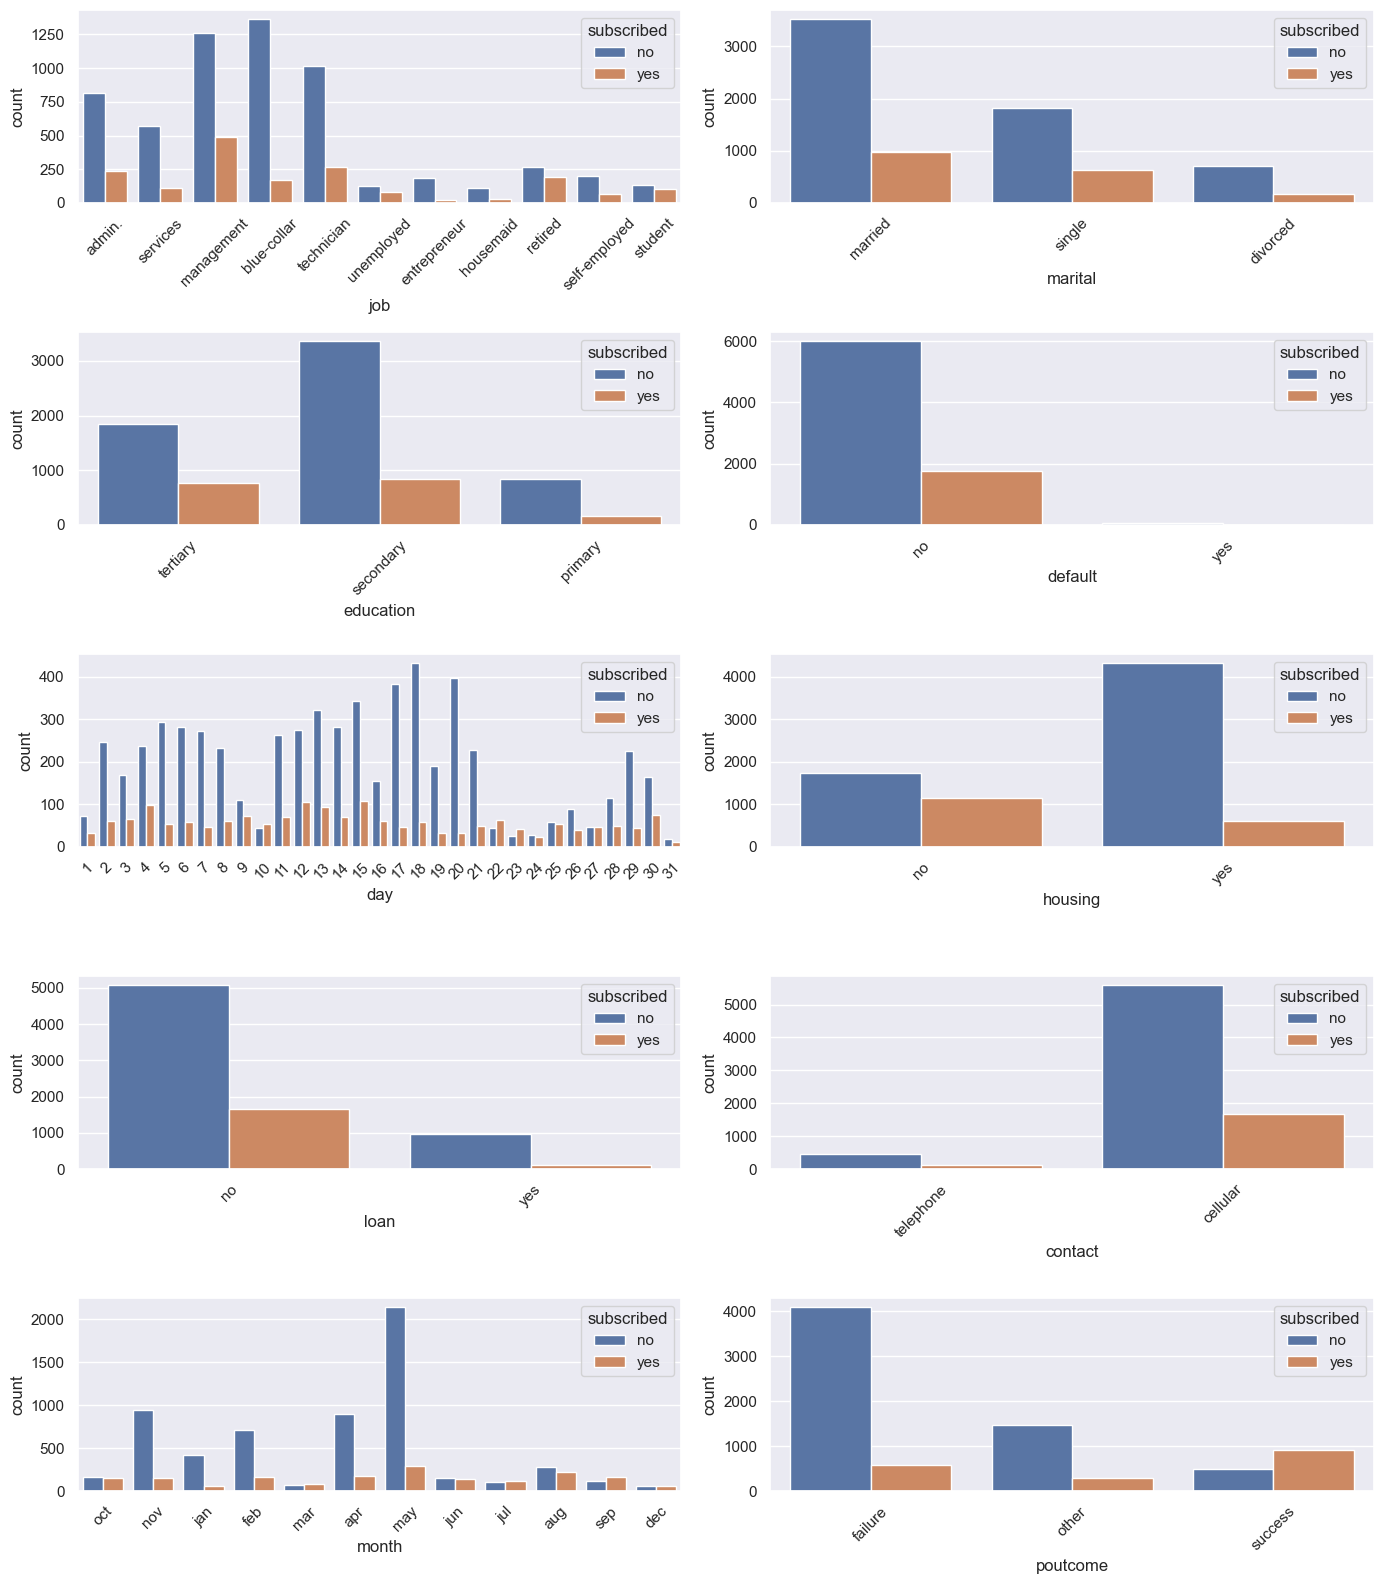

In [25]:
# Create a 5x2 grid of subplots
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 16))

# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default','day', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Create count plots for each categorical column
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, hue='subscribed', data=df, ax=axes[i // 2, i % 2])
    axes[i // 2, i % 2].set_xticks(axes[i // 2, i % 2].get_xticks())  # Set the ticks first
    axes[i // 2, i % 2].set_xticklabels(axes[i // 2, i % 2].get_xticklabels(), rotation=45)  # Rotate x-axis labels

plt.tight_layout()
plt.show()


# 5.0 Insights

- The subscription rate for term deposits is low, with only 24% of clients opting for them.
- Older individuals are more likely to subscribe, suggesting that age plays a role in subscription decisions.
- Clients with higher balances tend to subscribe.
- Longer conversations during calls positively influence subscription outcomes.
- Recent contact matters, and building on successful past interactions is crucial.
- Demographics (such as job type, marital status, default status, and education level) impact subscription rates.
- Cellular contacts are more effective than other methods.
- Timing, including seasonal patterns, plays a crucial role in client subscriptions.